In [55]:
librarian::shelf(tidyverse, DescTools, ggsci, ggthemes, showtext)

rds_addr <- '/home/anarinsk/github/simsangjung/rds/df.rds'

readRDS(rds_addr) %>% 
  select(-index) %>% 
  group_by(year, cat) %>% 
  mutate(
    q1000 = as.integer(quintile), 
    q100 = cut(quintile, breaks = 100) %>% as.integer(),
    q10 = cut(quintile, breaks = 10) %>% as.integer()
    ) %>% 
  select(-quintile) -> tbl 

tbl %>% 
  filter(variable == 'income') %>% 
  group_by(year, cat) %>% 
  summarise(sum_yearcat = sum(value)) -> tbl2

tbl %>% 
  filter(variable == 'n') %>% 
  select(q1000, year, cat, value) %>% 
  rename(n = value) -> tbl3

tbl %>% 
  filter(variable == "income") %>% 
  left_join(tbl2, by = c("year", "cat")) %>% 
  left_join(tbl3, by = c('q1000', 'year', 'cat')) %>% 
  select(-variable) %>% 
  rename(income = value) -> income 

In [56]:
font_add_google("Gothic A1", "ga1") 

In [65]:
df_by_q <- function(var,is_work, df=income){
  
  if(is_work == T){
    df <- df %>% filter(cat == "work")
  } else {
    df <- df %>% filter(year == 2016)
  }
  var_enq = enquo(var)
  df %>% 
    group_by(year, cat, !!var_enq) %>% 
    summarise(
      value = sum(income), 
      share = value / first(sum_yearcat),  
      mean = value / sum(n)
    )
}
generate_2016_q <- function(var){
  
  var_enq <- enquo(var)
  str_extract_all(deparse(substitute(var)), "[0-9]") %>% 
    unlist() %>%  
    str_c(collapse="") -> title
  
  df_by_q(!!var_enq, F) %>% 
  filter(!!var_enq %in% seq_len(10)) %>% 
  ggplot() + 
  aes(x = !!var_enq, y = share * 100) + 
  geom_col(width = 0.7) +
  scale_x_discrete(limits=as.character(seq_len(10))) +
  facet_grid(cols = vars(cat)) + 
  labs(
    title = str_glue("2016년 소득원천별 점유율 (상위 1-10분위, {title}분위 기준)"),  y = "%", x = "분위") + 
  theme_bw() +
  theme(text=element_text(size=10,  family="nago"))
}
generate_work_q <- function(var, q = seq_len(10)){
  var_enq <- enquo(var)
  str_extract_all(deparse(substitute(var)), "[0-9]") %>% 
    unlist() %>%  
    str_c(collapse="") -> title
    
    showtext_begin()
    
  df_by_q(!!var_enq, T) %>% 
    filter(!!var_enq %in% q) %>% 
    ggplot() + 
    aes(x = year, y = share, fill = factor(!!var_enq)) + 
    geom_col(width = 0.7) + 
    scale_x_discrete(limits=c(2013,2014,2015,2016)) + 
    theme_bw() + 
    scale_fill_simpsons(name = "분위") + 
    labs(
      title = str_glue("노동소득 {title}분위 분배율 변화 (2013-2016)"),
      x = "연도", 
      y = "누적 %"
    ) +
    theme(text=element_text(family="ga1"))
    
    showtext_end()
}

In [69]:
#generate_2016_q(q1000)
#generate_2016_q(q100)
#generate_2016_q(q10)
generate_work_q(q10, seq(5,10,1))

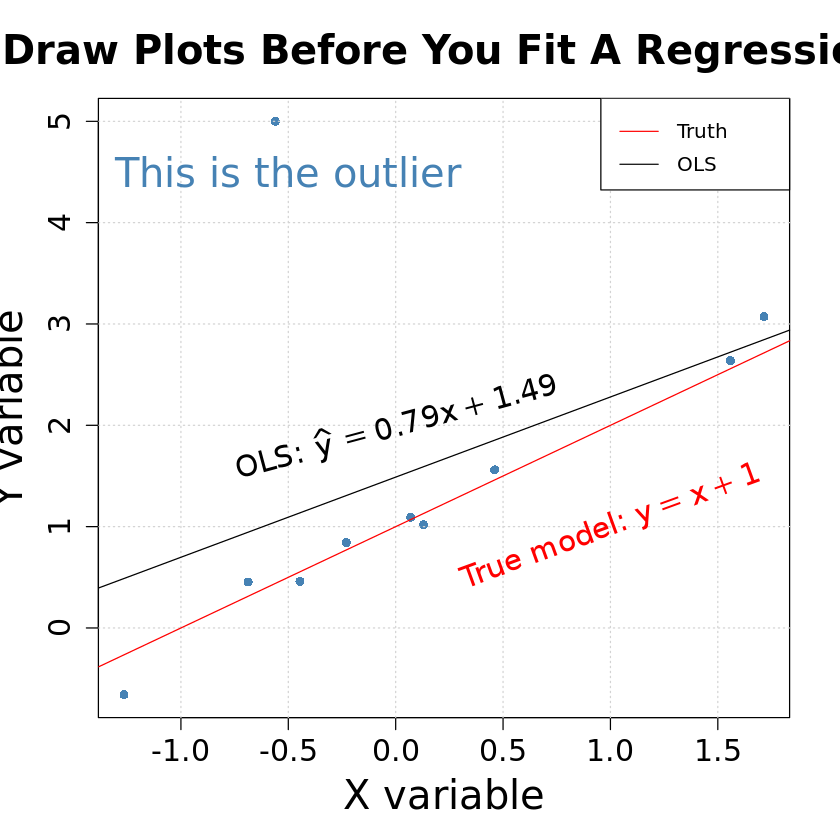

In [71]:
library(showtext)
## Loading Google fonts (http://www.google.com/fonts)
font_add_google("Gochi Hand", "gochi")
font_add_google("Schoolbell", "bell")
font_add_google("Covered By Your Grace", "grace")
font_add_google("Rock Salt", "rock")

## Automatically use showtext to render text for future devices

#showtext_auto()

## Tell showtext the resolution of the device,
## only needed for bitmap graphics. Default is 96
## showtext_opts(dpi = 96)

set.seed(123)
x = rnorm(10)
y = 1 + x + rnorm(10, sd = 0.2)
y[1] = 5
mod = lm(y ~ x)

## Plotting functions as usual
## Open a graphics device if you want, e.g.
## png("demo.png", 700, 600, res = 96)

showtext_begin()
op = par(cex.lab = 2, cex.axis = 1.5, cex.main = 2)
plot(x, y, pch = 16, col = "steelblue",
     xlab = "X variable", ylab = "Y variable", family = "gochi")
grid()
title("Draw Plots Before You Fit A Regression", family = "bell")
text(-0.5, 4.5, "This is the outlier", cex = 2, col = "steelblue",
     family = "grace")
abline(coef(mod))
abline(1, 1, col = "red")
par(family = "rock")
text(1, 1, expression(paste("True model: ", y == x + 1)),
     cex = 1.5, col = "red", srt = 20)
text(0, 2, expression(paste("OLS: ", hat(y) == 0.79 * x + 1.49)),
     cex = 1.5, srt = 15)
legend("topright", legend = c("Truth", "OLS"), col = c("red", "black"), lty = 1)

par(op)
showtext_end()